In [1]:
from glob import glob
import pandas as pd
import pickle
import sys
from tqdm.notebook import tqdm

sys.path.insert(1, 'utils/')
from graph_distances import *
from dcwetk.cwe_distance import *

In [5]:
testWord = 'ציוני'
testWUMs = {}

In [6]:
for name in tqdm(glob('byp_decade_wums/*.pickle')):
    yr = int(name[16:20])
    with open(name, 'rb') as f:
        wums = pickle.load(f)
        f.close()
        
    if testWord in wums.keys():
        testWUMs[yr] = wums[testWord]

  0%|          | 0/27 [00:00<?, ?it/s]

In [7]:
print(len(testWUMs))

12


In [16]:
from sklearn.decomposition import PCA
import itertools
import matplotlib.animation as animation

def plotWUM(wums_dict, word):
    wums_pca = [PCA(n_components=3).fit_transform(j.u) for i, j in wums_dict.items()]
    
    xs = []
    ys = []
    zs = []
    
    for w in wums_pca:
        x, y, z = list(zip(*w))
        xs.append(x)
        ys.append(y)
        zs.append(z)
        
    x_iter = itertools.cycle(xs)
    y_iter = itertools.cycle(ys)
    z_iter = itertools.cycle(zs)
    
    yrs = itertools.cycle(list(wums_dict.keys()))
    
    fig, ax = plt.subplots(figsize=(6,6))
    
    def update(i):
        ax.clear()
        ax.set_xlim((-15, 15))
        ax.set_ylim((-15, 15))
        
        ax.scatter(next(x_iter), next(y_iter), c=next(z_iter), cmap='viridis')
        ax.set_title(next(yrs))
        
    ani = animation.FuncAnimation(fig, update, frames=len(wums_dict), interval=1000)
    ani.save(word + '.gif', writer='pillow')

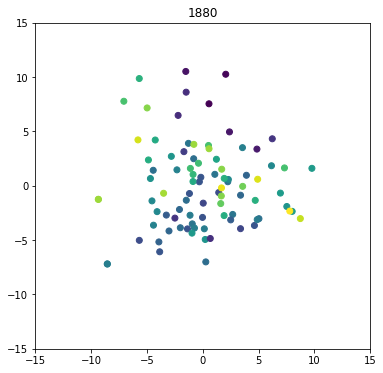

In [17]:
plotWUM(testWUMs, testWord)